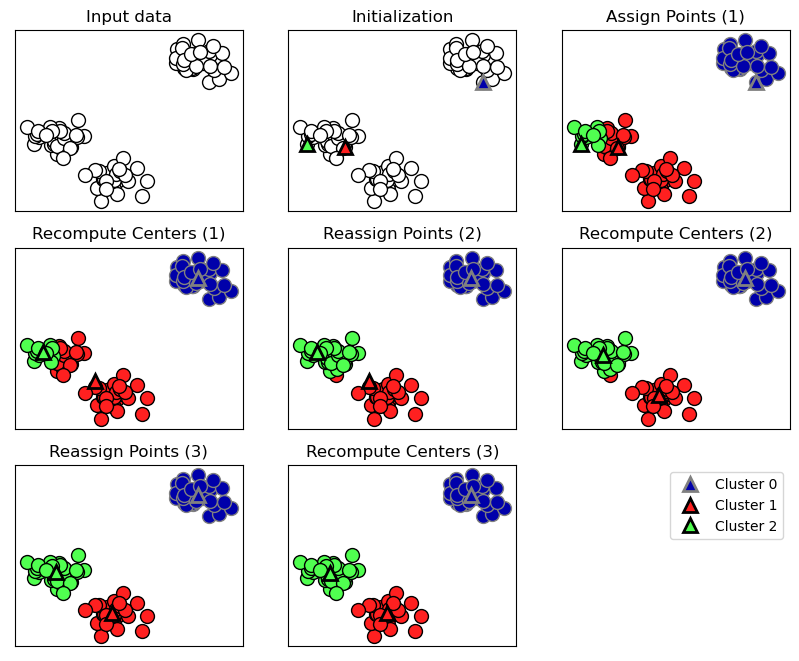

In [1]:
# kmeans 알고리즘에 대한 설명
import mglearn
mglearn.plots.plot_kmeans_algorithm()

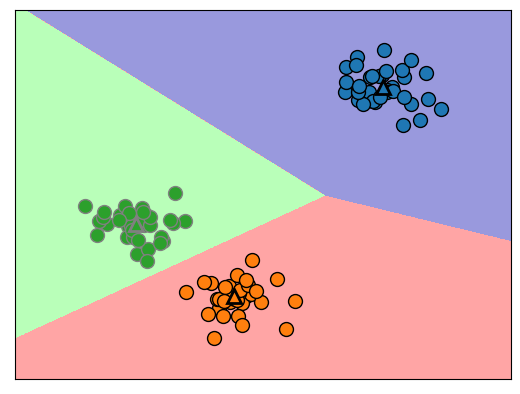

In [2]:
# kmeans 경계 표시
import matplotlib.pyplot as plt
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
            [10, 2], [10, 4], [10, 0]])

#2개의 클러스터로 구분
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#모형이 분류한 라벨
print(kmeans.labels_)

#새로운 값에 대한 분류
X_new=np.array([[0, 0], [12, 3]])
print(kmeans.predict(X_new))

#중심좌표
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


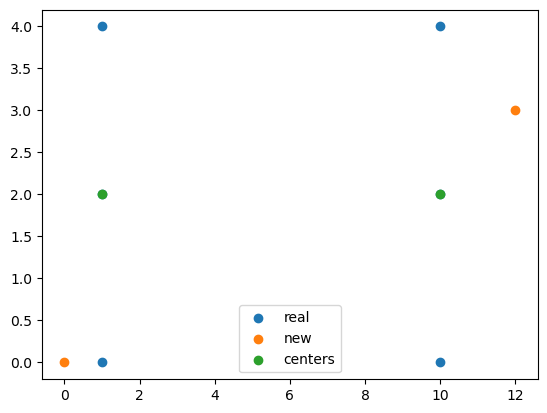

In [4]:
plt.scatter(X[:,0],X[:,1],label='real')
plt.scatter(X_new[:,0], X_new[:,1] ,label='new')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers')
plt.legend()
plt.show()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)

# 군집 모형 생성
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [6]:
# 모형이 분류한 값
lbl=model.labels_
lbl

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

In [7]:
#예측한 값
pred = model.predict(X)
print(pred)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [8]:
# 모델의 정확도
import sklearn.metrics as sm
sm.accuracy_score(y, pred)

0.34

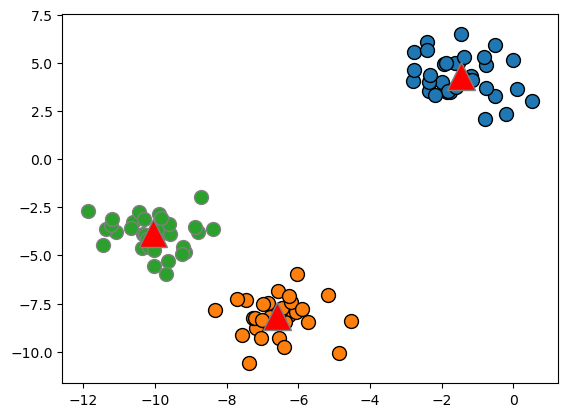

In [9]:
#3개의 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')
#centers
mglearn.discrete_scatter(model.cluster_centers_[:, 0], 
                        model.cluster_centers_[:,1], [0, 1, 2],
                        markers='^', c='r', s=20)
plt.show()

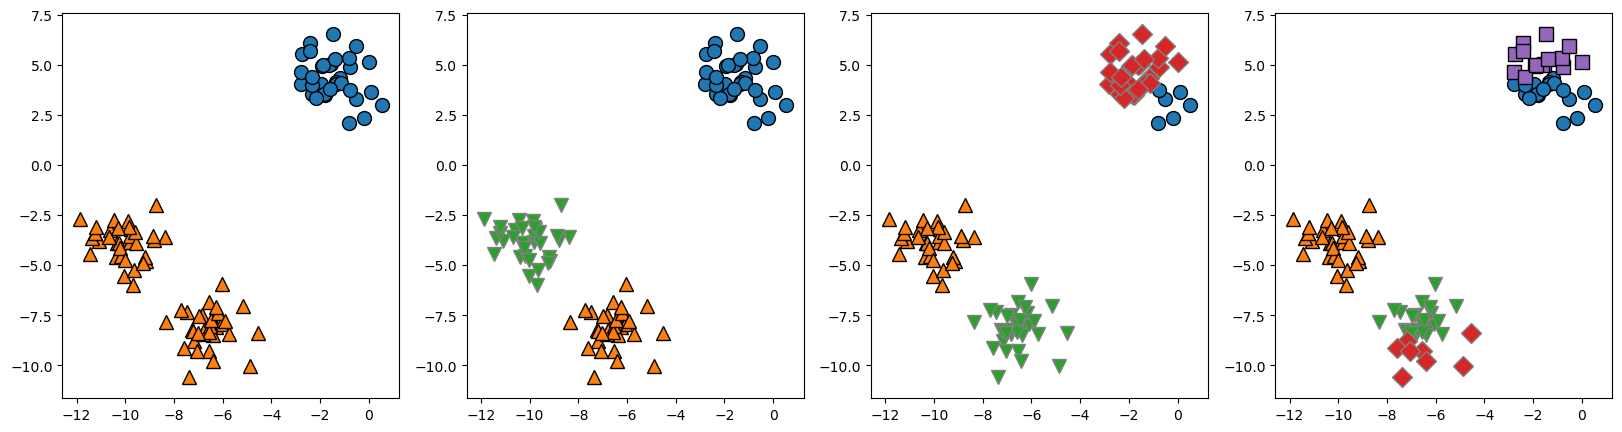

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax=axes[idx])
    idx+=1

> 오존량 예측

In [13]:
import pandas as pd

df = pd.read_csv("c:/vscode/data/ozone/ozone2.csv")

In [14]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, stratify=y,random_state=10)

Text(0.5, 0, 'number of clusters')

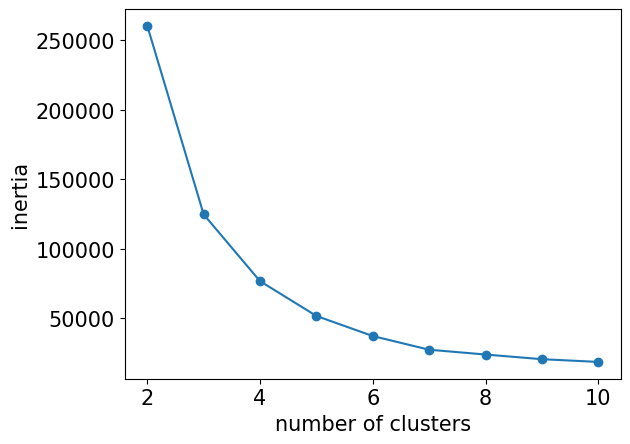

In [15]:
#최적의 클러스터 갯수를 구하는 방법
#inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값
#작을수록 응집도가 높은 군집

from sklearn.cluster import KMeans

clusters = range(2, 11)
inertias = []
for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n,random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)
plt.rcParams["font.size"]=15
plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")
#엘보우(elbow) 기법
#inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분 3
#따라서 3개의 클러스터로 분류하는 것이 적절함

In [16]:
model = KMeans(n_clusters=3,random_state=10)
print(model)
pred=model.fit_predict(X_train)
print(pred[:5])
pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[0 2 1 2 1]
[1 1 0 1 2]


In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test, pred)

0.5558953548440109

In [18]:
model = KMeans(n_clusters=2,random_state=10)
print(model)
pred=model.fit_predict(X_train)
print(pred[:5])
pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[0 1 1 1 1]
[1 1 0 1 1]


In [19]:
silhouette_score(X_test, pred)

0.6729790456857528

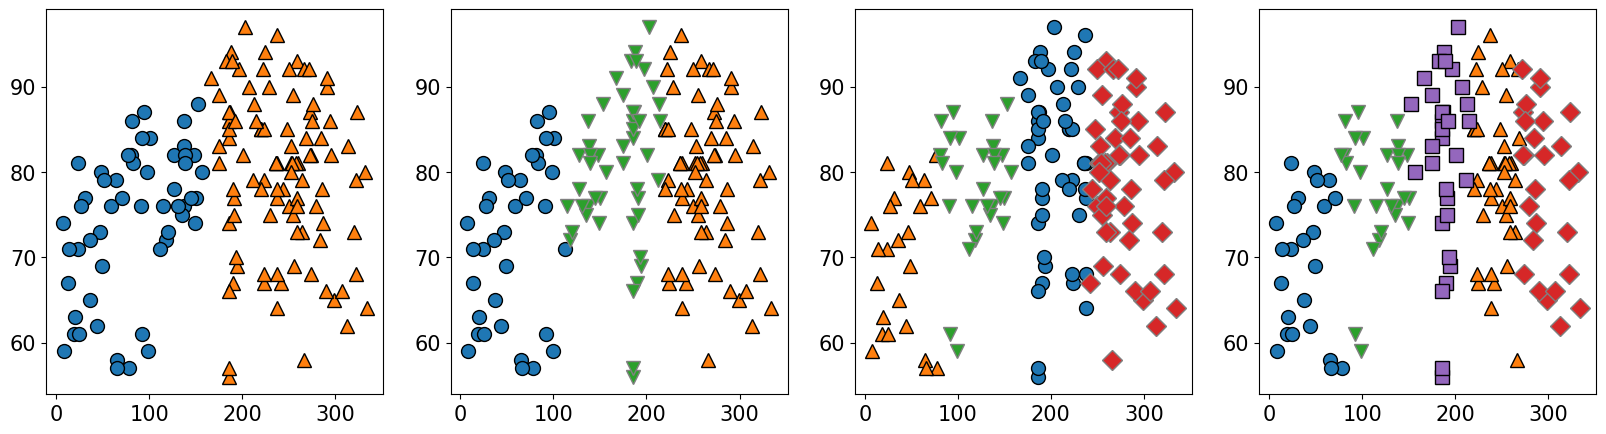

In [20]:
from matplotlib import pyplot as plt
import mglearn
#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls,
    ax=axes[idx])
    idx+=1

> IRIS data

In [21]:
from sklearn import datasets
iris = datasets.load_iris()

In [22]:
import pandas as pd
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
df=pd.concat([X,y],axis=1)

Text(0.5, 1.0, '꽃받침')

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


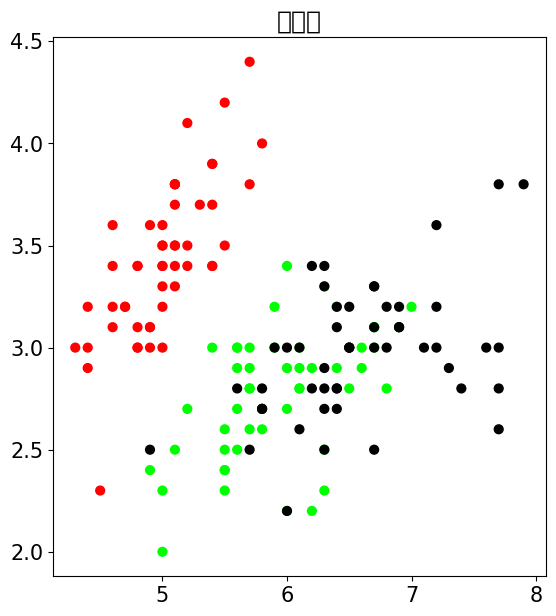

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 사이즈
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 꽃받침 기준 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width,
            c=colormap[y.Targets], s=40)
plt.title('꽃받침')

Text(0.5, 1.0, '꽃잎')

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


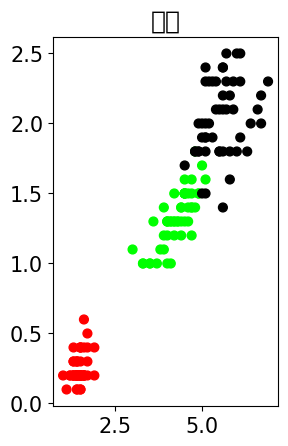

In [24]:
# 꽃잎 기준 그래프
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width,
c=colormap[y.Targets], s=40)
plt.title('꽃잎')

In [25]:
# KMeans Cluster 모델 생성(클러스터 3개)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=0)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [26]:
# clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, '클러스터링 결과')

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 

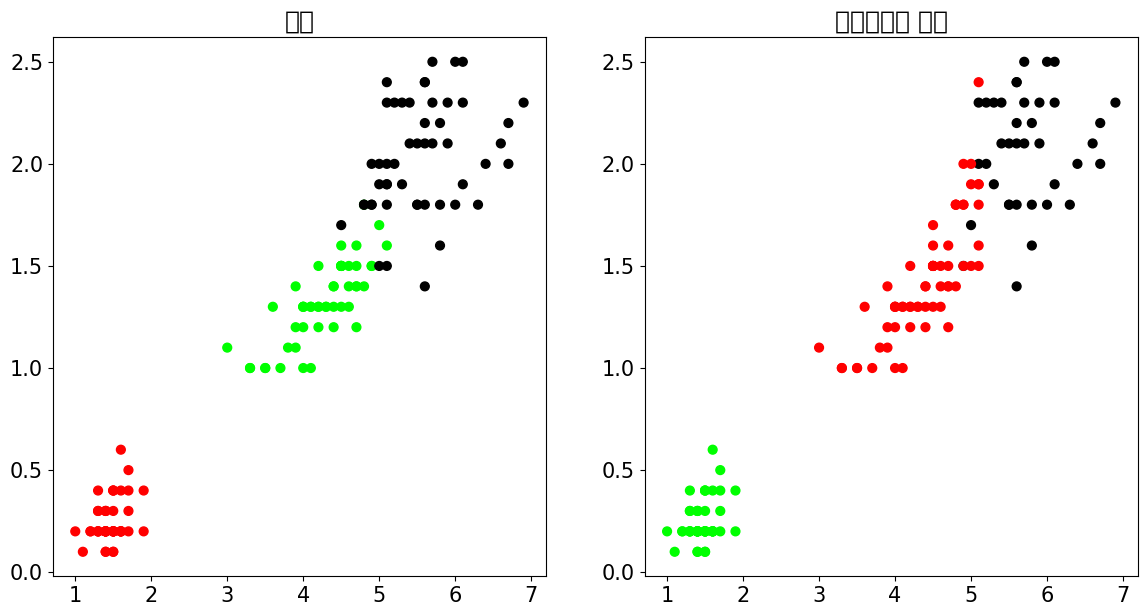

In [33]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width,c=colormap[model.labels_], s=40)
plt.title('클러스터링 결과')

In [29]:
# label 순번 변경
# [0,1,2]에서 [1,0,2]로 변경 ( 0과 1을 서로 바꿈 )
pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, '클러스터링 결과')

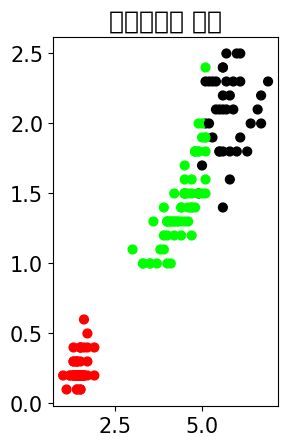

In [31]:
# 그래프 출력(예측)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred],
s=40)
plt.title('클러스터링 결과')

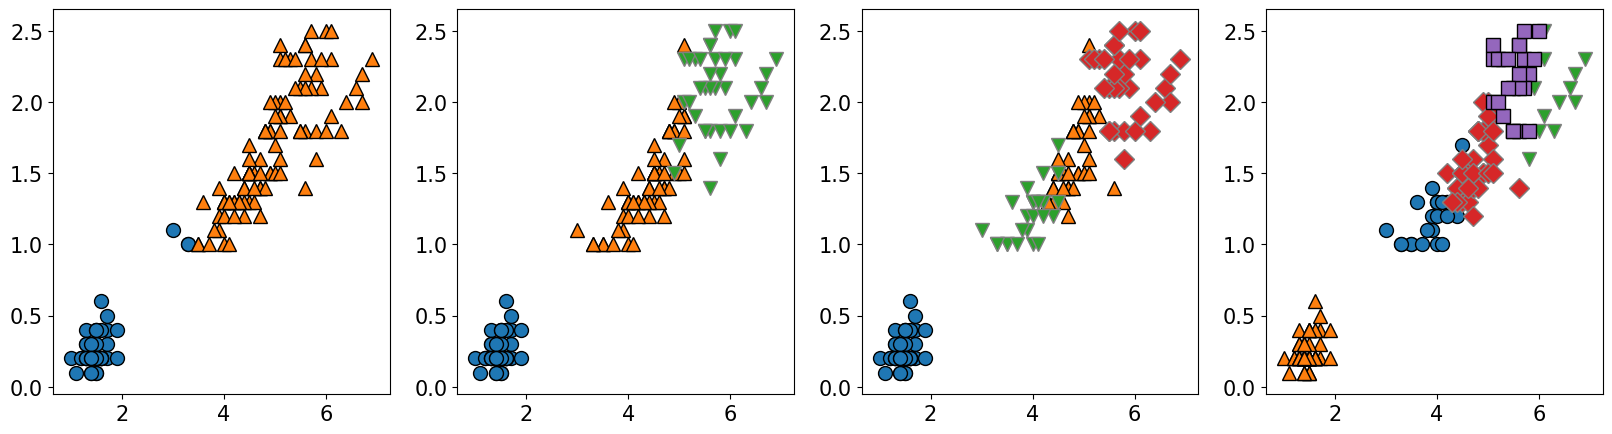

In [32]:
from matplotlib import pyplot as plt
#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# 2,3,4,5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Petal_Length"],
    X["Petal_Width"], lbls, ax=axes[idx])
    idx+=1

> k-means++

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()

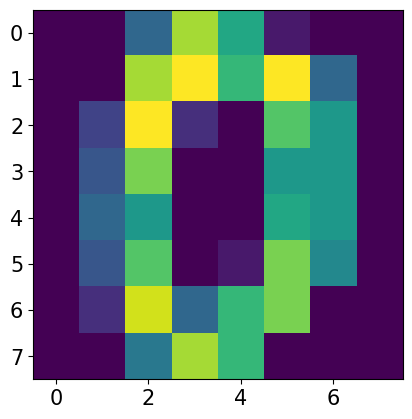

In [35]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8))

In [36]:
from sklearn.cluster import KMeans

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_
print(model.cluster_centers_) #중심좌표

[[ 0.00000000e+00  1.66533454e-16  3.07228916e-01  7.16265060e+00
   1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
   2.60208521e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
   8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
   1.30104261e-18  6.44578313e-01  1.07108434e+01  1.15602410e+01
   4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
   6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
   6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
   0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
   1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
   9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
   1.48373494e+01  1.07590361e+01  1.56626506e+00  1.04083409e-17
   6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
   1.40843373e+01  4.13253012e+00  1.80722892e-02 -8.32667268e-17
   1.08420217e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
   1.23253

In [37]:
import matplotlib.pyplot as plt
def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

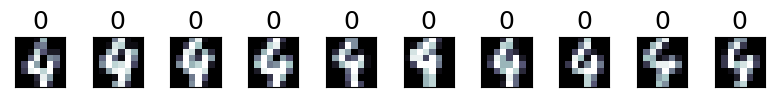

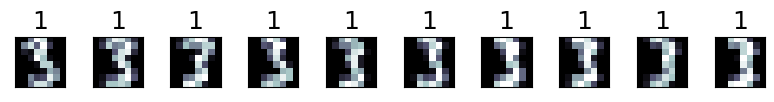

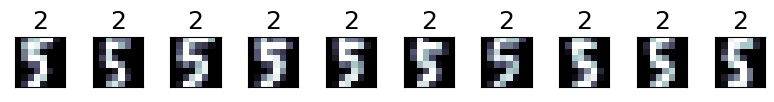

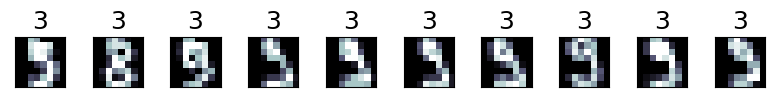

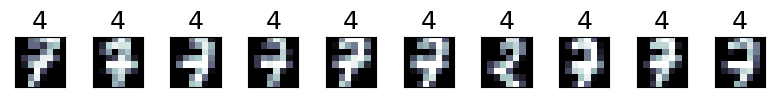

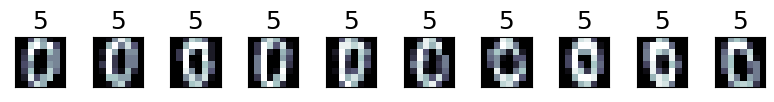

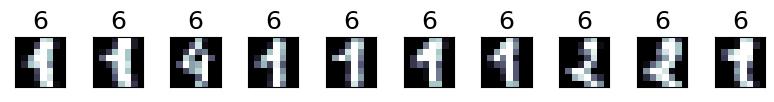

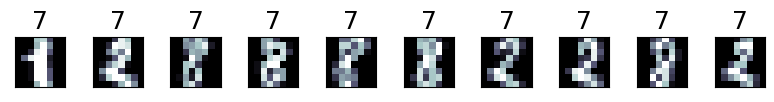

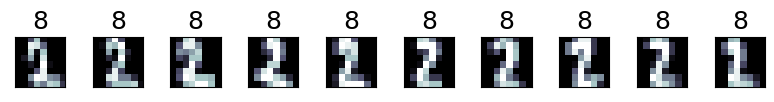

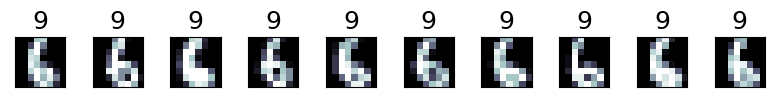

In [38]:
for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]], dtype=int64)

In [40]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(digits.data, y_pred)

0.18251916424600556

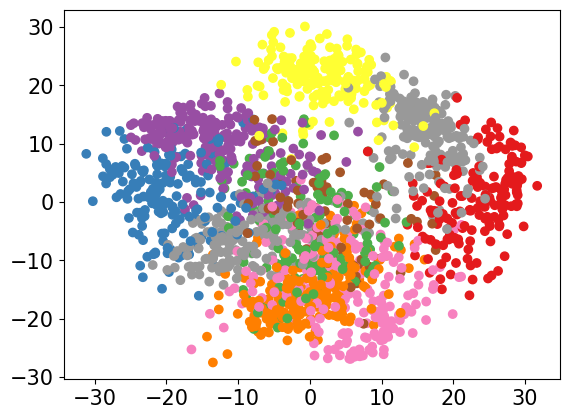

In [41]:
#군집화 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

> mini batch

In [42]:
from sklearn.datasets import make_blobs
#샘플갯수 n_samples
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5,
0.5], random_state=170)

In [43]:
from sklearn.cluster import KMeans
#기본모형
model1 = KMeans(n_clusters=3).fit(X)

In [44]:
#미니배치를 적용한 모형(속도가 더 빠름)
#데이터를 미니배치 크기만큼 무작위로 분리하여 처리
from sklearn.cluster import MiniBatchKMeans
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1536).fit(X)

In [46]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X[:10000], model1.predict(X[:10000]))

0.6487004457360496

In [47]:
silhouette_score(X[:10000], model2.predict(X[:10000]))

0.6487458763165781

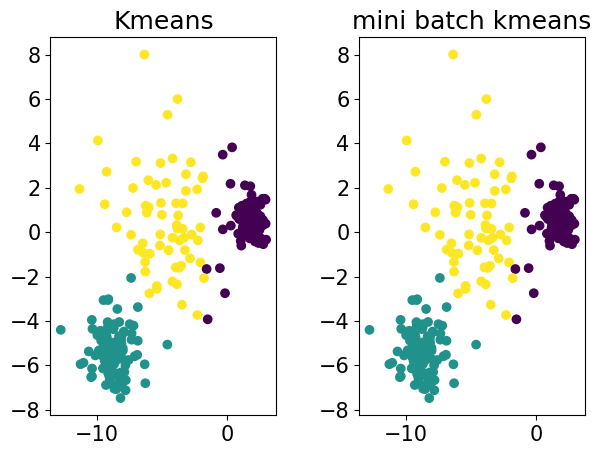

In [45]:
import matplotlib.pyplot as plt
import numpy as np
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("Kmeans")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()
plt.show()
#결과는 큰 차이가 없음

> mini batch (iris)

In [48]:
import pandas as pd
df = pd.read_csv('c:/vscode/data/iris/iris.csv')

In [50]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [52]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X=df[cols]
y=df['Species']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [53]:
from sklearn.cluster import MiniBatchKMeans
#batch_size 기본값 100개
model = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=50)
model.fit(X_std)

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=50, n_clusters=3, random_state=0)

In [54]:
# clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

Text(0.5, 1.0, 'clustering')

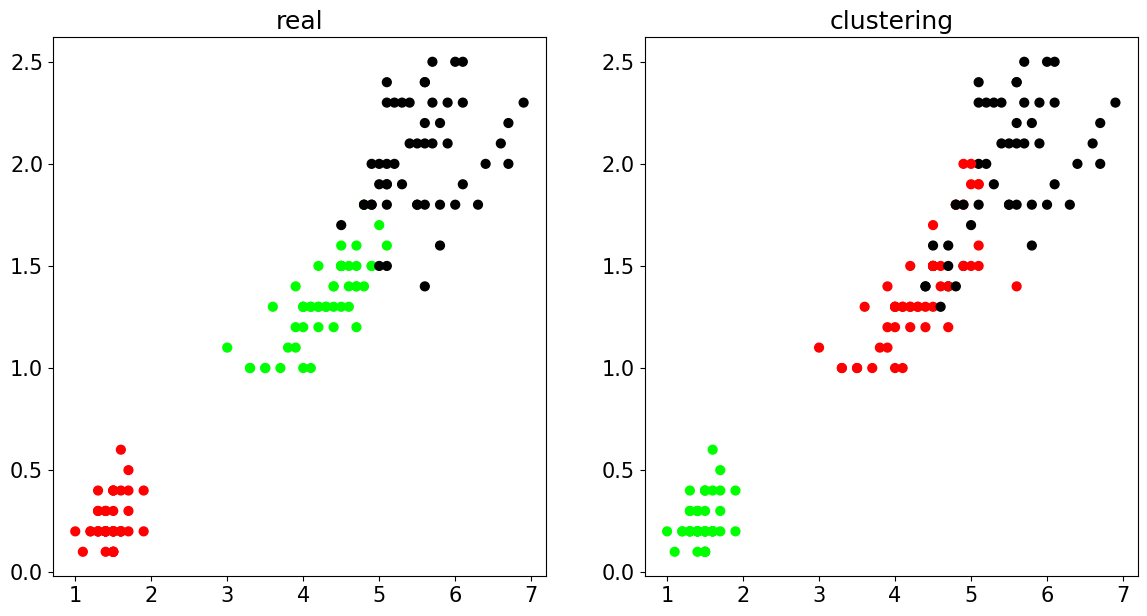

In [56]:
import matplotlib.pyplot as plt
import numpy as np
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colormap[y], s=40)
plt.title('real')

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colormap[model.labels_], s=40)
plt.title('clustering')

Text(0.5, 1.0, 'clustering')

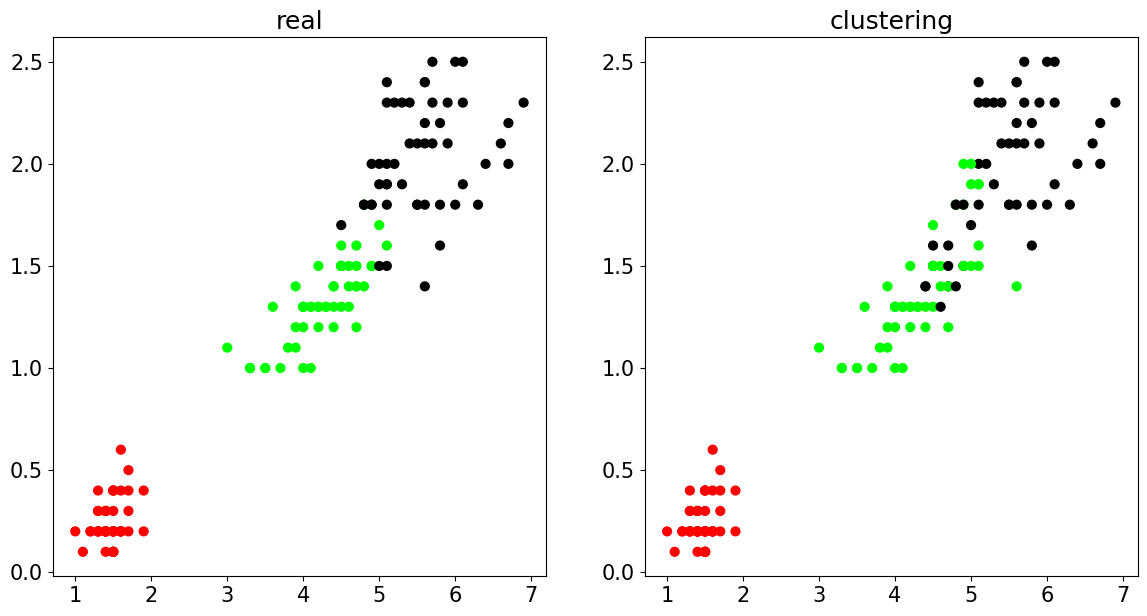

In [58]:
## 라벨 맞게 색 변경
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colors1 = np.array(['red', 'lime', 'black'])
colors2 = np.array(['lime', 'red', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colors1[y], s=40)
plt.title('real')

# 그래프 출력(예측)
plt.subplot(1, 2, 2)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colors2[model.labels_], s=40)
plt.title('clustering')

> mini batch(face)

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

# 샘플 이미지 로딩
one_image = load_sample_image("china.jpg")

#이미지의 차원
print(one_image.shape)

(427, 640, 3)


([], [])

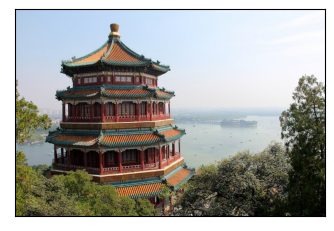

In [60]:
# 전체 이미지
plt.figure(figsize=(4, 4))
plt.imshow(one_image, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

(161048, 100, 150, 3)


([], [])

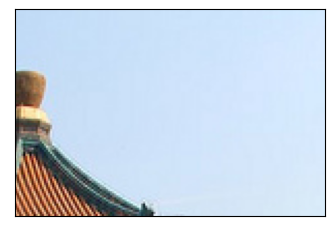

In [61]:
#부분 이미지 리스트
# (100,150) patch size
patches = image.extract_patches_2d(one_image, (100, 150))
print(patches.shape)

#부분 이미지
plt.figure(figsize=(4, 4))
plt.imshow(patches[200], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [62]:
import time
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

In [63]:
# 미니배치 사이즈 기본값 1024
kmeans = MiniBatchKMeans(n_clusters=81, random_state=0, verbose=True)

#부분 이미지의 사이즈
patch_size = (20, 20)

buffer = []
t0 = time.time()
# 400장의 이미지를 6회 반복 : 2400
index = 0
for _ in range(6): # 전체 데이터를 6회 반복
    for img in faces.images: # 400장의 이미지
        data = extract_patches_2d(img, patch_size,
                                max_patches=50,random_state=0)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            #버퍼에 누적
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print('부분 학습 : %4i / %i'
                % (index, 6 * len(faces.images)))
dt = time.time() - t0
print('실행시간:', dt)

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 4 cluster centers.
부분 학습 :  100 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 :  200 / 2400
[MiniBatchKMeans] Reassigning 2 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 :  300 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 :  400 / 2400
부분 학습 :  500 / 2400
부분 학습 :  600 / 2400
부분 학습 :  700 / 2400
부분 학습 :  800 / 2400
부분 학습 :  900 / 2400
부분 학습 : 1000 / 2400
부분 학습 : 1100 / 2400
부분 학습 : 1200 / 2400
부분 학습 : 1300 / 2400
부분 학습 : 1400 / 2400
부분 학습 : 1500 / 2400
부분 학습 : 1600 / 2400
부분 학습 : 1700 / 2400
부분 학습 : 1800 / 2400
부분 학습 : 1900 / 2400
부분 학습 : 2000 / 2400
부분 학습 : 2100 / 2400
부분 학습 : 2200 / 2400
부분 학습 : 2300 / 2400
부분 학습 : 2400 / 2400
실행시간: 7.64953351020813


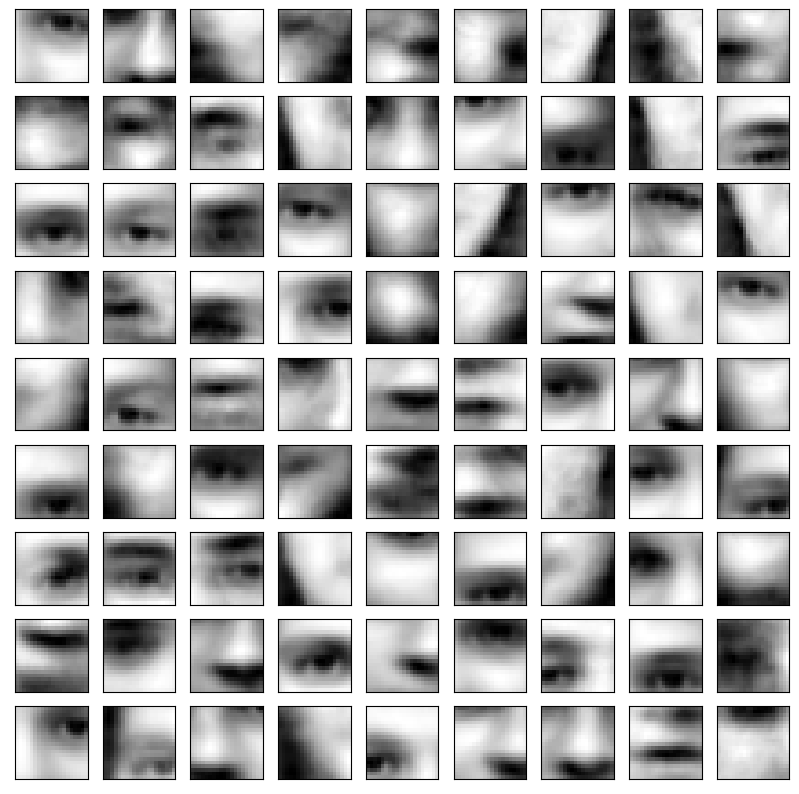

In [64]:
plt.figure(figsize=(10, 10))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()

> 계층적 군집화

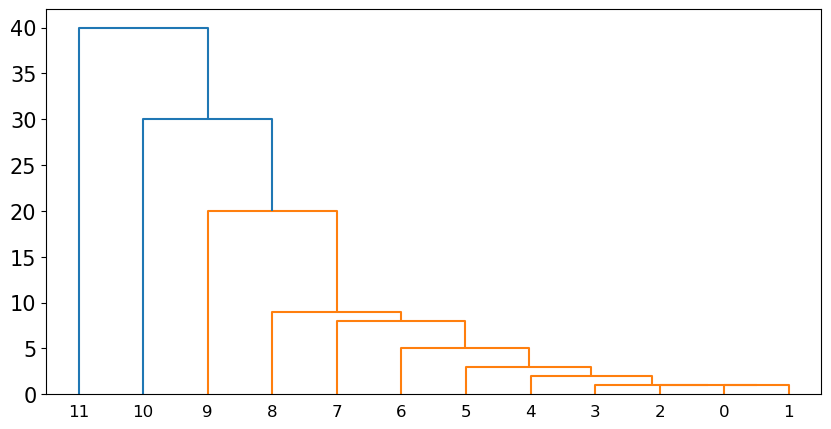

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

X = np.array([[i] for i in [0,1,2,3,5,8,13,21,30,50,80,120]])
# 두 군집의 가장 가까운 샘플의 거리를 기준으로 계산
Z = linkage(X, 'single')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

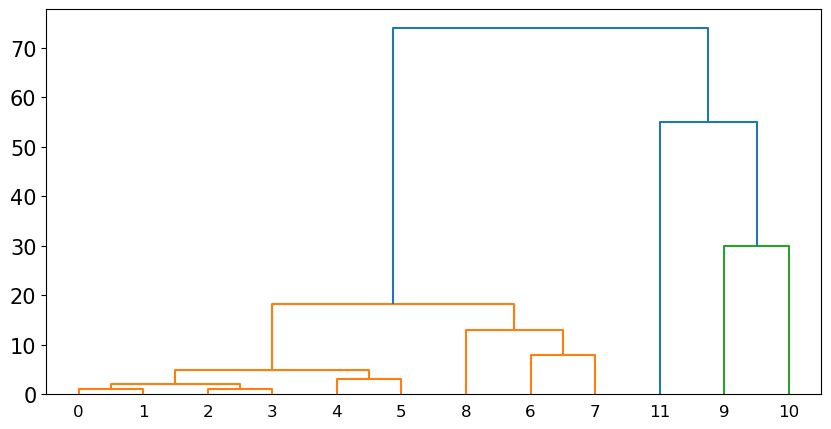

In [66]:
#두 군집의 모든 데이터의 평균거리를 기준으로 구분
Z = linkage(X, 'average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

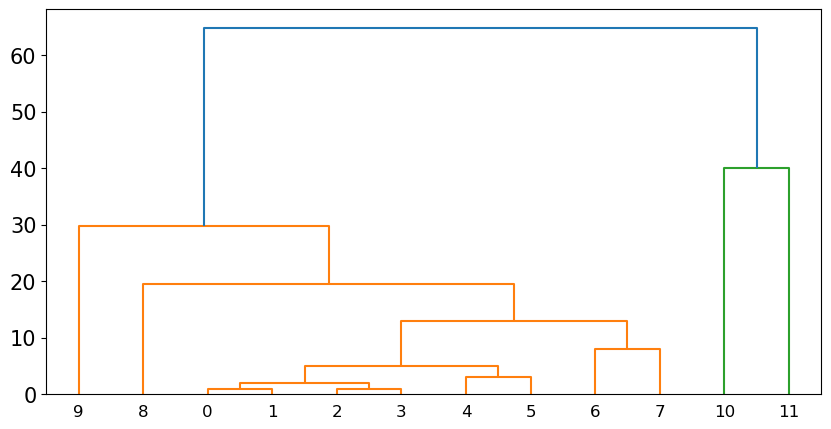

In [67]:
#가중 거리 방식
# 군집a와 군집b를 합쳐서 군집 c를 만들었다면
# 군집c와 군집d의 거리는 a와 d의 거리, b와 d의 거리의 평균을 사용하는 방식
Z = linkage(X, 'weighted')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

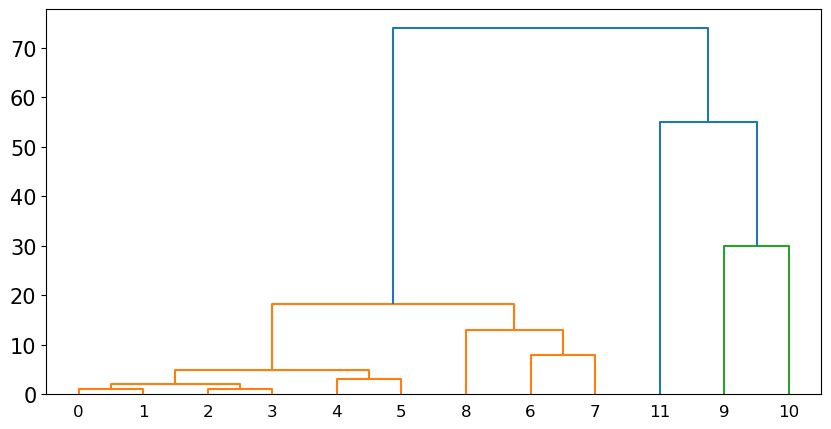

In [68]:
# 두 군집의 중심점의 거리를 기준으로 계산
Z = linkage(X, 'centroid')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

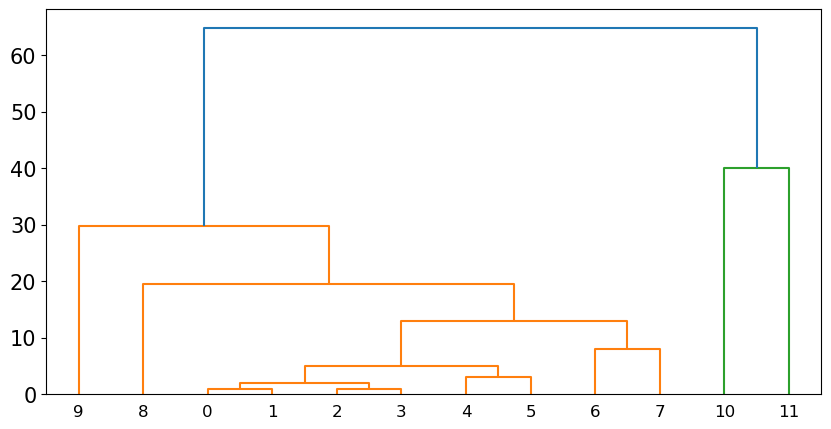

In [69]:
#두 군집을 결합하여 새로운 군집을 만든 경우 두 군집의 중심점의 중앙값을 중심으로 계산
#군집의 모든 데이터와의 평균거리를 계산하는 방식보다 속도가 빠른 장점이 있음
Z = linkage(X, 'median')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

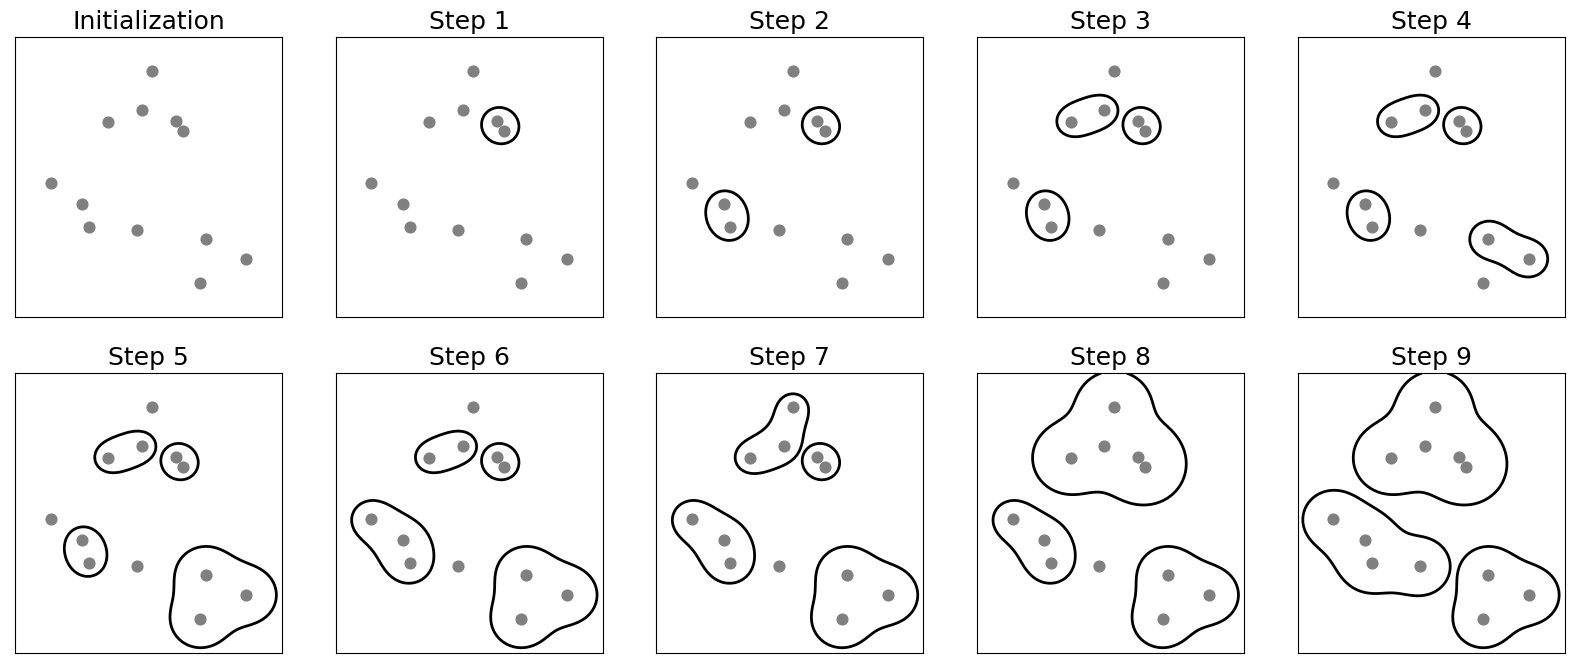

In [70]:
#시작할 때 각 포인트를 하나의 클러스터로 지정하고 가장 비슷한 두 클러스터를 합치는 방식
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

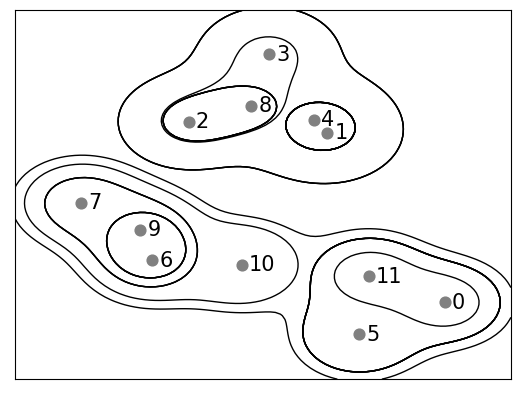

In [71]:
mglearn.plots.plot_agglomerative()

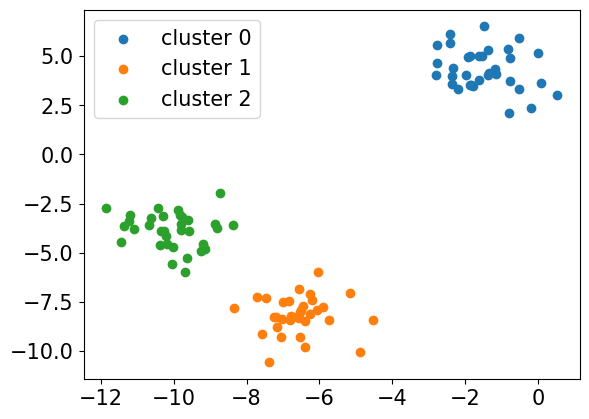

In [72]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)

# 배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1, 1)
x1 = np.hstack([X, a])

# 각 클래스별로 데이터 추출
x_0 = x1[x1[:, 2]==0, :]
x_1 = x1[x1[:, 2]==1, :]
x_2 = x1[x1[:, 2]==2, :]

# 시각화
plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()

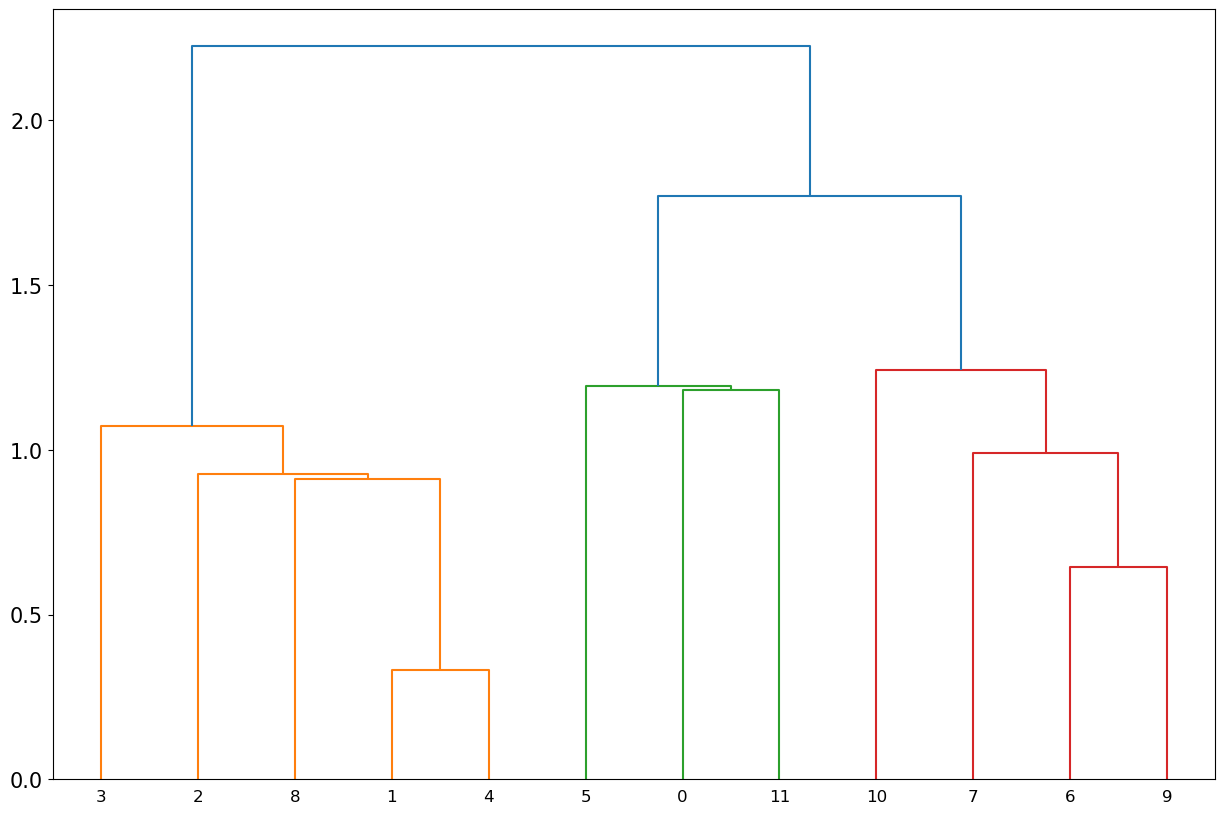

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
X, y = make_blobs(random_state=0, n_samples=12)
Z = linkage(X, 'single')
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.show()

> DBSCAN 군집화

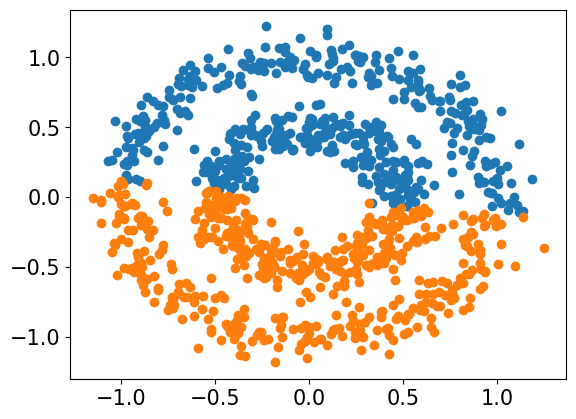

In [74]:
#kmeans의 단점 : 군집의 모양에 따라 잘 작동하지 않을 수 있음,
#군집 개수를 직접 지정해야 함
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

np.random.seed(2)
#factor : 내부 원과 외부 원 사이의 비율
X1, y1 = make_circles(n_samples=1000, factor=.5, noise=.09)
model = KMeans(n_clusters=2,random_state=10)
model.fit(X1)
plt.scatter(X1[model.labels_ == 0, 0], X1[model.labels_ == 0,1])
plt.scatter(X1[model.labels_ == 1, 0], X1[model.labels_ == 1,1])

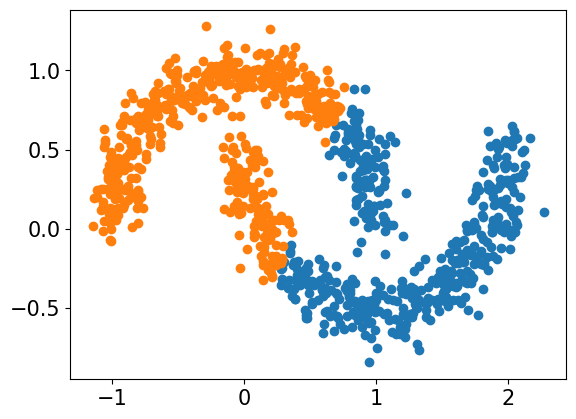

In [75]:
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=1000, noise=.1)
model = KMeans(n_clusters=2,random_state=10)
model.fit(X2)
plt.scatter(X2[model.labels_ == 0, 0], X2[model.labels_ == 0,1])
plt.scatter(X2[model.labels_ == 1, 0], X2[model.labels_ == 1,1])

In [ ]:
# DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 군집화
# 데이터의 밀도에 기반한 군집화
# 포인트가 많이 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식
# 어떤 포인트를 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
# 군집의 갯수를 사용자가 지정할 필요가 없음
# 최소거리(이웃을 정의하기 위한 거리), 최소 데이터 갯수(밀집지역을 정의하기 위해 필요한 이웃의 갯수)

DBSCAN(eps=3, min_samples=2)
[ 0  0  0  1  1  2  2 -1]


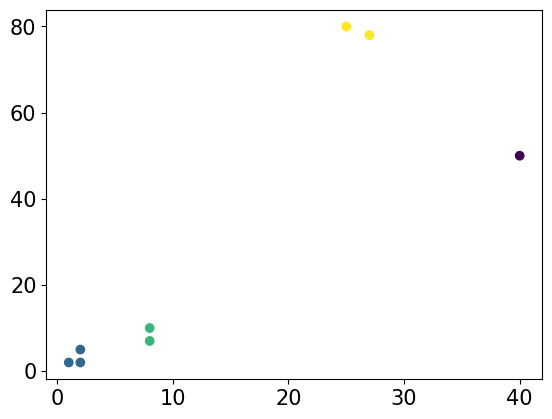

In [76]:
from sklearn.cluster import DBSCAN
import numpy as np

X = np.array([[1, 2], [2, 2], [2, 5],
[8, 7], [8, 10], [25, 80], [27,78], [40,50]])
#최소거리 3, 최소샘플갯수 2개
# eps(epsilon) : 이웃을 정의하기 위한 거리, 기본값 0.5
# min_samples : 핵심데이터를 정의하기 위해 필요한 이웃영역 안의 데이터 갯수, 기본값 5
model = DBSCAN(eps=3, min_samples=2).fit(X)
print(model)
plt.scatter(X[:,0],X[:,1],c=model.labels_)
print(model.labels_) #3개로 나눠짐(-1은 노이즈가 있는 데이터,아웃라이어)

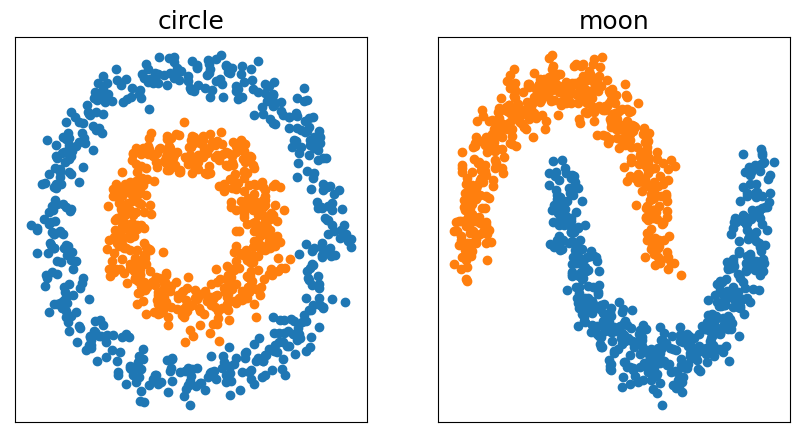

In [77]:
def plot_DBSCAN(title, X, eps):
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1])
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1])
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_DBSCAN("circle", X1, 0.1)
plt.subplot(122)
plot_DBSCAN("moon", X2, 0.1)

> DBSCAN (iris)

In [78]:
import pandas as pd
df=pd.read_csv('c:/vscode/data/iris/iris.csv')

In [79]:
cols=df.columns[:-2]
X=df[cols]
y=df['Species']

In [85]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
# model = DBSCAN(eps=0.5,min_samples=5)
model = DBSCAN(eps=1,min_samples=3)
pipeline = make_pipeline(scaler,model)
pred = pd.DataFrame(pipeline.fit_predict(X))
pred.columns=['predict']
result = pd.concat([X,y,pred],axis=1)

In [82]:
# 노이즈가 있는 샘플들은 -1로 처리됨
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

Text(0.5, 1.0, 'clustering')

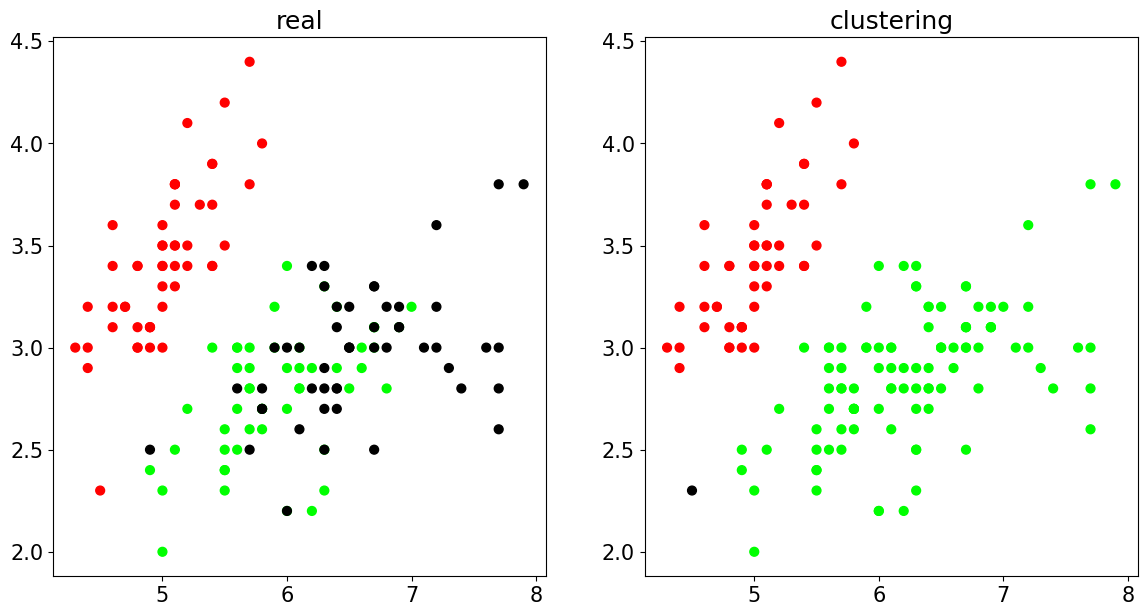

In [86]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(result['SepalLength'], result['SepalWidth'],
c=colormap[y], s=40)
plt.title('real')

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(result['SepalLength'], result['SepalWidth'],
c=colormap[model.labels_], s=40)
plt.title('clustering')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15336\213926438.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)


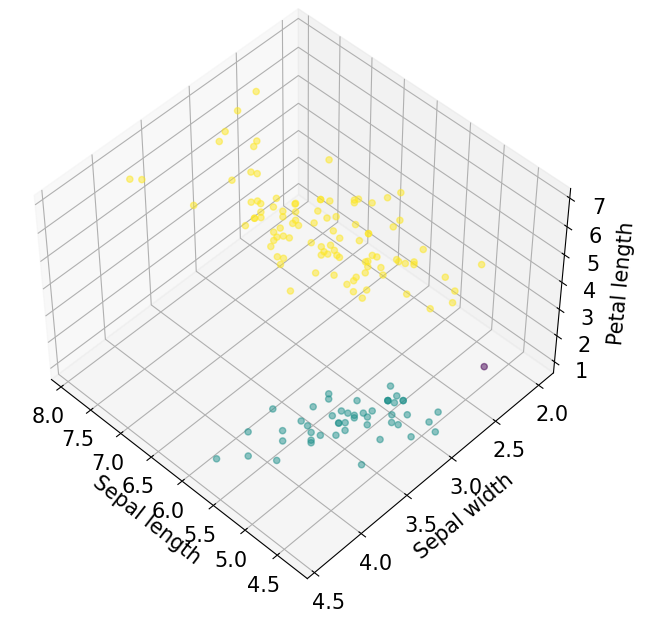

In [87]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))
# rect : 축의 위치 left, bottom, width, height
# elev 고도보기 각도(기본값 30), azim 방위각(기본값 -60)
ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
ax.scatter(result['SepalLength'],result['SepalWidth'],result['PetalLength'],c=result['predict'],alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()